# Business Problem
As a marketing agency, our primary objective is to maximize the return on investment (ROI) for our clients' advertising campaigns. We have conducted two ad campaigns, one on Facebook and the other on AdWords, and we need to determine which platform yields better results in terms of clicks, conversions, and overall cost-effectiveness. By identifying the most effective platform, we can allocate our resources more efficiently and optimize our advertising strategies to deliver better outcomes for our clients.

# Research Question
Which ad platform is more effective in terms of conversions, clicks, and overall cost-effectiveness?

# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import coint
import warnings
warnings.filterwarnings('ignore')


# Data Description
The dataset comprises a collection of data comparing the performance of two separate ad campaigns conducted throughout the period from December 22, 2021, to December 20, 2024. Specifically, the data covers a Facebook Ad campaign and an AdWords Ad campaign. For each day within this period, there is a corresponding row in the dataset, resulting in a 1000 of lines of campaign data to analyze corresponding to the days in this range. The dataset includes various performance metrics for each ad campaign, providing insights into their effectiveness and efficiency over time.


Key features included in the dataset are as follows:
- 
Date: The date corresponding to each row of campaign data, ranging from December 22, 2021, to December 20, 2024.- 

Ad Views: The number of times the ad was viewe- d.

Ad Clicks: The number of clicks received on the-  ad.

Ad Conversions: The number of conversions resulting from t- he ad.

Cost per Ad: The cost associated with running the Facebook ad c- ampaign.

Click-Through Rate (CTR): The ratio of clicks to views, indicating the effectiveness of the ad in generati- ng clicks.

Conversion Rate: The ratio of conversions to clicks, reflecting the effectiveness of the ad in driving desi- red actions.

Cost per Click (CPC): The average cost incurred per click on the ad.



In [2]:
# loading the dataset
df = pd.read_csv('A_B_testing_dataset.csv')

In [3]:
# data overview
df.head()

,date_of_campaign,facebook_ad_campaign,facebook_ad_views,facebook_ad_clicks,facebook_ad_conversions,facebook_cost_per_ad,facebook_ctr,facebook_conversion_rate,facebook_cost_per_click,adword_ad_campaign,adword_ad_views,adword_ad_clicks,adword_ad_conversions,adword_cost_per_ad,adword_ctr,adword_conversion_rate,adword_cost_per_click
0,2021-12-22,FACEBOOK AD,3172,62,14,141,1.95,22.58,2.27,ADWORD AD,5754,64,9,177,1.11,14.06,2.77
1,2021-12-24,FACEBOOK AD,3211,38,9,186,1.18,23.68,4.89,ADWORD AD,4954,73,6,54,1.47,8.22,0.74
2,2021-12-25,FACEBOOK AD,1936,53,15,66,2.74,28.30,1.25,ADWORD AD,4702,38,9,187,0.81,23.68,4.92
3,2021-12-25,FACEBOOK AD,1194,45,9,71,3.77,20.00,1.58,ADWORD AD,3718,58,3,161,1.56,5.17,2.78
4,2021-12-26,FACEBOOK AD,2479,44,12,174,1.77,27.27,3.95,ADWORD AD,5562,63,4,162,1.13,6.35,2.57


In [4]:
# rows and columns count of dataset
df.shape

(1000, 17)

In [5]:
# datatypes of columns
df.dtypes

date_of_campaign             object
facebook_ad_campaign         object
facebook_ad_views             int64
facebook_ad_clicks            int64
facebook_ad_conversions       int64
facebook_cost_per_ad          int64
facebook_ctr                float64
facebook_conversion_rate    float64
facebook_cost_per_click     float64
adword_ad_campaign           object
adword_ad_views               int64
adword_ad_clicks              int64
adword_ad_conversions         int64
adword_cost_per_ad            int64
adword_ctr                  float64
adword_conversion_rate      float64
adword_cost_per_click       float64
dtype: object

In [9]:
# Converting date to datetime
df['date_of_campaign'] = pd.to_datetime(df['date_of_campaign']) 
df['date_of_campaign'] 

0     2021-12-22
1     2021-12-24
2     2021-12-25
3     2021-12-25
4     2021-12-26
         ...    
995   2024-12-17
996   2024-12-18
997   2024-12-18
998   2024-12-20
999   2024-12-20
Name: date_of_campaign, Length: 1000, dtype: datetime64[ns]

In [7]:
# describe stats of the campaigns
df.describe()

,date_of_campaign,facebook_ad_views,facebook_ad_clicks,facebook_ad_conversions,facebook_cost_per_ad,facebook_ctr,facebook_conversion_rate,facebook_cost_per_click,adword_ad_views,adword_ad_clicks,adword_ad_conversions,adword_cost_per_ad,adword_ctr,adword_conversion_rate,adword_cost_per_click
count,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2023-07-04 07:13:26.399999744,2152.031000,44.196000,11.975000,156.610000,2.28316,32.696080,4.310500,4771.438000,60.128000,5.933000,124.741000,1.280950,10.807510,2.265540
min,2021-12-22 00:00:00,1050.000000,15.000000,5.000000,60.000000,0.49000,6.850000,0.960000,3715.000000,31.000000,3.000000,50.000000,0.540000,3.370000,0.580000
25%,2022-10-07 18:00:00,1600.250000,30.000000,8.000000,110.000000,1.36750,18.052500,2.337500,4258.250000,45.000000,4.000000,86.000000,0.940000,6.970000,1.470000
50%,2023-07-20 12:00:00,2123.500000,44.500000,12.000000,156.000000,2.07000,27.120000,3.600000,4808.500000,60.000000,6.000000,124.000000,1.260000,9.720000,2.030000
75%,2024-03-24 00:00:00,2706.250000,58.000000,16.000000,205.000000,2.92250,41.880000,5.610000,5300.750000,75.000000,8.000000,163.000000,1.570000,13.485000,2.802500
max,2024-12-20 00:00:00,3320.000000,73.000000,19.000000,250.000000,6.86000,118.750000,16.530000,5754.000000,89.000000,9.000000,200.000000,2.370000,29.030000,6.190000
std,NaN,661.982166,16.833328,4.298471,54.918904,1.20670,20.570796,2.751582,598.647684,17.047822,2.011606,43.809053,0.402492,5.205133,1.101846


# Comparing Campaign Performance


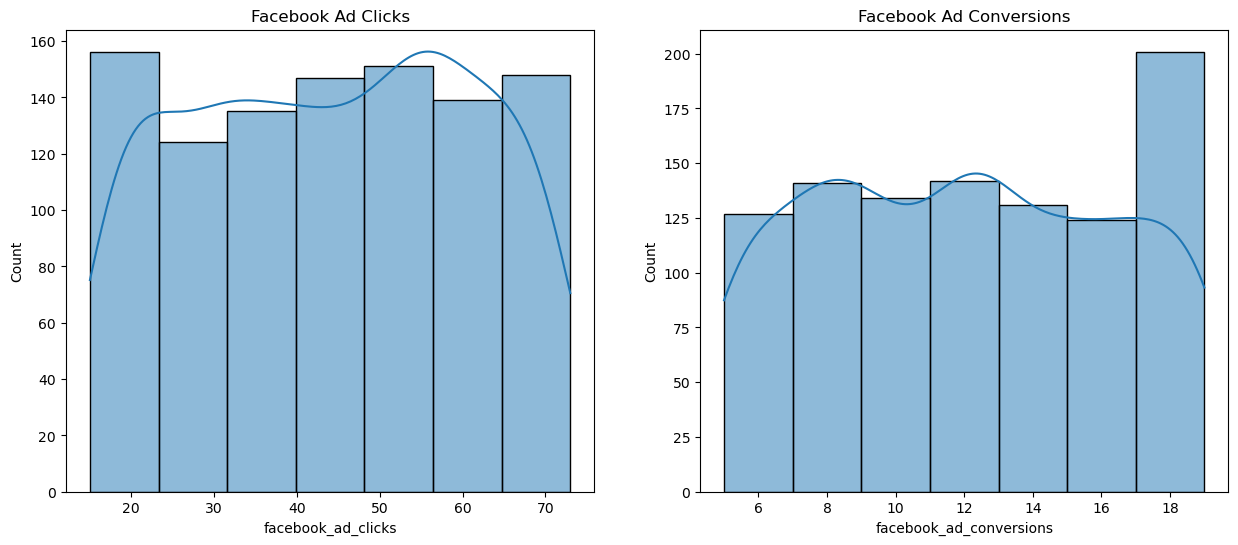

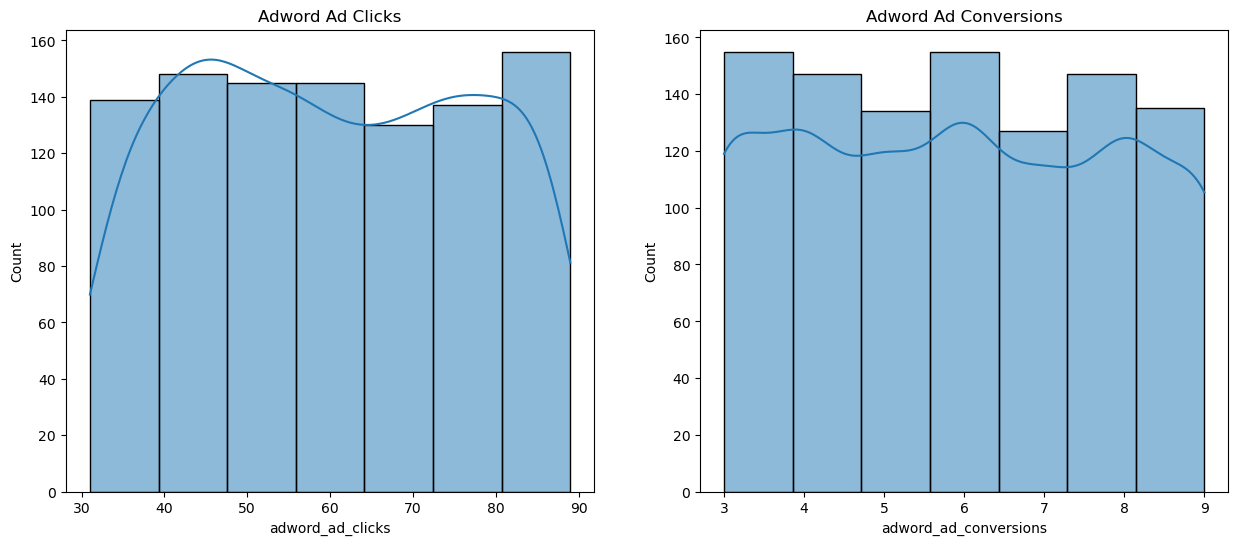

In [10]:
# Distribution of the clicks and conversions
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Facebook Ad Clicks')
sns.histplot(df['facebook_ad_clicks'], bins=7, edgecolor='k', kde=True)
plt.subplot(1,2,2)
plt.title('Facebook Ad Conversions')
sns.histplot(df['facebook_ad_conversions'], bins=7, edgecolor='k', kde=True)
plt.show()

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Adword Ad Clicks')
sns.histplot(df['adword_ad_clicks'], bins=7, edgecolor='k', kde=True)
plt.subplot(1,2,2)
plt.title('Adword Ad Conversions')
sns.histplot(df['adword_ad_conversions'], bins=7, edgecolor='k', kde=True)
plt.show()

All the histograms are showing somewhat symmetrical shapes. This symmetrical shape suggests that the number of clicks and conversions is relatively evenly distributed. In other words, there ar not many clicks or conversions that are outliers on either the high or low end.

# How frequently do we observe days with high numbers of conversions compared to days with low numbers of conversions

In [11]:
df['facebook_ad_conversions']

0      14
1       9
2      15
3       9
4      12
       ..
995     8
996    13
997    19
998    19
999     9
Name: facebook_ad_conversions, Length: 1000, dtype: int64

In [12]:
# creating function to calculate the category for the conversions
def create_conversion_category(conversion_col):
    category = []
    for conversion in df[conversion_col]:
        if conversion < 6:
            category.append('Less than 6')
        elif 6 <= conversion < 11:
            category.append('6 - 10')
        elif 11 <= conversion < 16:
            category.append('10 - 15')
        else:
            category.append('more than 15')
    return category

# applying function to different campaign's conversions
df['facebook_conversion_category'] = create_conversion_category('facebook_ad_conversions')
df['adword_conversion_category'] = create_conversion_category('adword_ad_conversions')

In [15]:
# Display relevant columns
print(df[['facebook_ad_conversions', 'facebook_conversion_category', 
          'adword_ad_conversions', 'adword_conversion_category']].head())

   facebook_ad_conversions facebook_conversion_category  \
0                       14                      10 - 15   
1                        9                       6 - 10   
2                       15                      10 - 15   
3                        9                       6 - 10   
4                       12                      10 - 15   

   adword_ad_conversions adword_conversion_category  
0                      9                     6 - 10  
1                      6                     6 - 10  
2                      9                     6 - 10  
3                      3                Less than 6  
4                      4                Less than 6  


In [16]:
# Count values in Facebook conversion category
print("\nFacebook Conversion Category Counts:")
print(df['facebook_conversion_category'].value_counts())


Facebook Conversion Category Counts:
facebook_conversion_category
10 - 15         341
6 - 10          337
more than 15    257
Less than 6      65
Name: count, dtype: int64


In [18]:
pd.DataFrame(df['facebook_conversion_category'].value_counts()).reset_index()

,facebook_conversion_category,count
0,10 - 15,341
1,6 - 10,337
2,more than 15,257
3,Less than 6,65


In [19]:
# Create DataFrame for Facebook conversion counts
facebook = pd.DataFrame(df['facebook_conversion_category'].value_counts()).reset_index().rename (columns = {'facebook_conversion_category' : 'Category'})
facebook

,Category,count
0,10 - 15,341
1,6 - 10,337
2,more than 15,257
3,Less than 6,65


In [20]:
# Count values in AdWords conversion category
print("\nAdWords Conversion Category Counts:")
print(df['adword_conversion_category'].value_counts())


AdWords Conversion Category Counts:
adword_conversion_category
6 - 10         564
Less than 6    436
Name: count, dtype: int64


In [21]:
pd.DataFrame(df['adword_conversion_category'].value_counts()).reset_index()

,adword_conversion_category,count
0,6 - 10,564
1,Less than 6,436


In [23]:
# Create DataFrame for Facebook conversion counts
adwords = pd.DataFrame(df['adword_conversion_category'].value_counts()).reset_index().rename (columns = {'adword_conversion_category' : 'Category'})
adwords

,Category,count
0,6 - 10,564
1,Less than 6,436


In [30]:
category_df= pd.merge(facebook, adwords, on = 'Category', how = 'outer').fillna(0)
category_df

,Category,count_x,count_y
0,10 - 15,341,0.0
1,6 - 10,337,564.0
2,Less than 6,65,436.0
3,more than 15,257,0.0


In [31]:
category_df= category_df.iloc[[ 2,1,0,3]]
category_df

,Category,count_x,count_y
2,Less than 6,65,436.0
1,6 - 10,337,564.0
0,10 - 15,341,0.0
3,more than 15,257,0.0


In [33]:
x_axis = np.arange(len(category_df))
x_axis

array([0, 1, 2, 3])

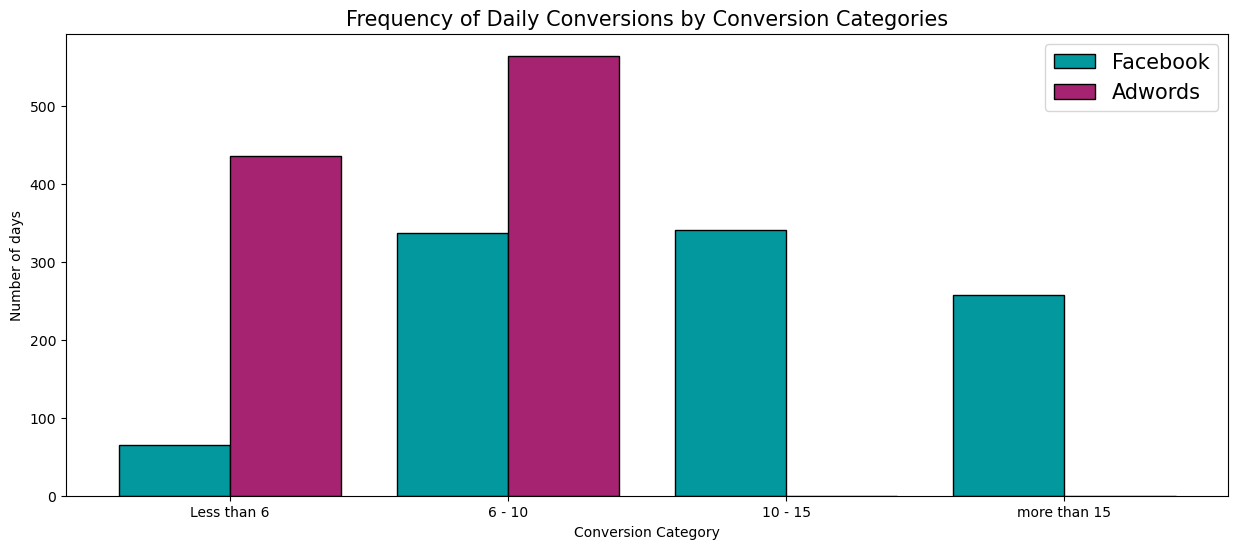

In [35]:
X_axis = np.arange(len(category_df))
plt.figure(figsize=(15,6))
plt.bar(X_axis - 0.2, category_df['count_x'], width=0.4, label='Facebook', color='#03989E', linewidth=1, edgecolor='k')
plt.bar(X_axis + 0.2, category_df['count_y'], width=0.4, label='Adwords', color='#A62372', linewidth=1, edgecolor='k')

plt.xticks(X_axis, category_df['Category'])
plt.xlabel('Conversion Category')
plt.ylabel("Number of days")
plt.title("Frequency of Daily Conversions by Conversion Categories", fontsize=15)
plt.legend(fontsize=15)
plt.show()

Analysis Text:

The data suggests Facebook had more frequent higher conversion days than AdWords, which either had very low conversion rates (less than 6) or moderate ones (6 - 10).

There is a significant variance in the number of high-conversion days between two different campaigns.

The absence of any days with conversions between 50 - 16 and more 5han 16 in AdWords indicates a need to review what strategies were changed or what external factors could have influenced these numbers.

# Do more clicks on the ad really lead to more sales?

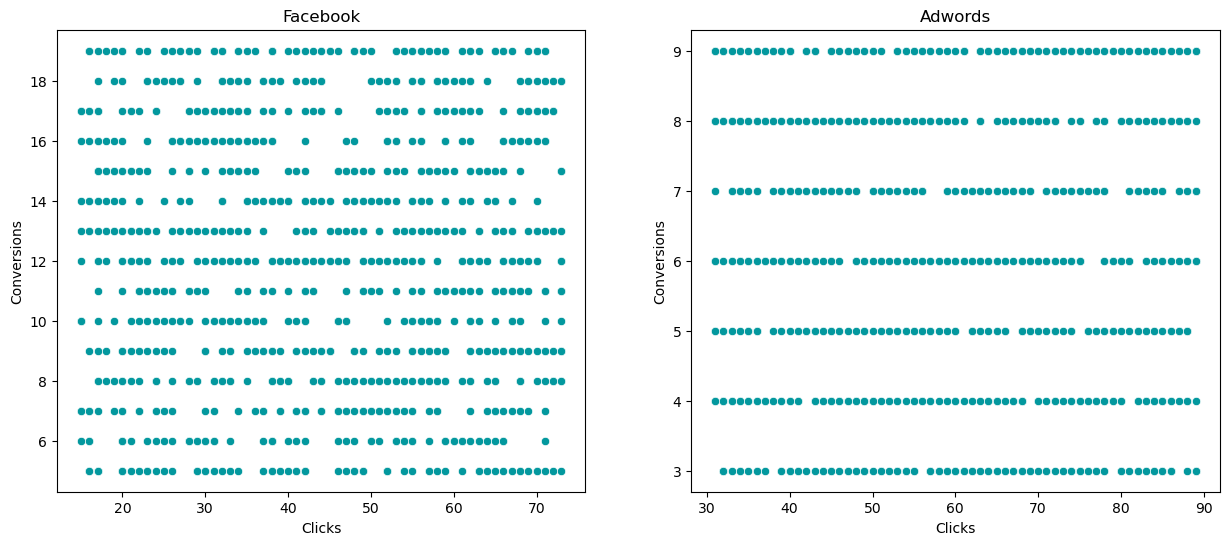

In [36]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Facebook')
sns.scatterplot(x=df['facebook_ad_clicks'], y=df['facebook_ad_conversions'], color='#03989E')
plt.xlabel('Clicks')  # Changed from duplicate ylabel
plt.ylabel('Conversions')
plt.subplot(1,2,2)
plt.title('Adwords')
sns.scatterplot(x=df['adword_ad_clicks'], y=df['adword_ad_conversions'], color='#03989E')
plt.xlabel('Clicks')  # Changed from duplicate ylabel
plt.ylabel('Conversions')
plt.show()






In [37]:
facebook_corr = df[['facebook_ad_conversions', 'facebook_ad_clicks']].corr()
print(facebook_corr)

                         facebook_ad_conversions  facebook_ad_clicks
facebook_ad_conversions                 1.000000           -0.005009
facebook_ad_clicks                     -0.005009            1.000000


In [38]:
adword_corr = df[['adword_ad_conversions', 'adword_ad_clicks']].corr()
print(adword_corr)

                       adword_ad_conversions  adword_ad_clicks
adword_ad_conversions               1.000000          0.004162
adword_ad_clicks                    0.004162          1.000000


In [40]:

print('\nCorrelation Results:')
print('Facebook:', round(facebook_corr.values[0,1], 4))
print('Adword:', round(adword_corr.values[0,1], 4))


Correlation Results:
Facebook: -0.005
Adword: 0.0042


A correlation coefficient of -0.005 indicates no meaningful relationship between clicks on Facebook ads and sales. This suggests that increasing Facebook ad clicks has virtually no effect on sales performance.

The near-zero correlation reveals that Facebook ads are currently ineffective at driving sales, as clicks show no statistical connection to conversion outcomes. This could indicate either poor ad targeting or a disconnect between ad content and landing page experience.

The negligible correlation (-0.005) between Facebook clicks and sales strongly suggests that the current Facebook advertising strategy requires complete reevaluation, as there is no evidence that clicks lead to conversions.

A correlation coefficient of 0.0042 shows there is essentially no linear relationship between AdWords clicks and sales. While technically positive, the effect size is so small as to be meaningless in practical terms.

The non-existent correlation for AdWords indicates the platform is failing to convert clicks into sales, suggesting either fundamental issues with keyword targeting or that the wrong metrics are being optimized in campaigns.

# Hypothesis Testing


**Hypothesis:** Advertising on AdWords will result in a greater number of conversions compared to advertising on Facebook.

**Null Hypothesis (H0):** There is no difference in the number of conversions between Facebook and AdWords, or the number of conversions from AdWords is greater than or equal to those from Facebook. 

H0: μ\_AdWords ≤ μ\_Facebook  

**Alternate Hypothesis (H1):** The number of conversions from Facebook is greater than the number of conversions from AdWords. 


H1: μ\_AdWords > μ\_Facebook 


In [41]:
print('Mean Conversion \n---')  
print('Facebook :', round(df['facebook_ad_conversions'].mean(), 2))  
print('AdWords :', round(df['adword_ad_conversions'].mean(), 2))

t_stats, p_value = st.ttest_ind(a=df['facebook_ad_conversions'], 
                               b=df['adword_ad_conversions'], 
                               equal_var=False,
                               alternative='greater')  # One-tailed test
print('\nt-statistic:', t_stats, '\np-value:', p_value)

# comparing the p value with the significance of 5% or 0.05  
if p_value < 0.05:  
    print('\np-value is less than significance value, Reject the null hypothesis')
else:  
    print('\np-value is greater than significance value, Fail to reject the null hypothesis')

Mean Conversion 
---
Facebook : 11.98
AdWords : 5.93

t-statistic: 40.25906231407935 
p-value: 3.443175943633713e-237

p-value is less than significance value, Reject the null hypothesis


• The mean number of conversions from Facebook ads (11.98) is substantially higher than the mean number of conversions from AdWords ads (5.93). This suggests that, on average, Facebook advertising is more effective in generating conversions compared to AdWords advertising.  

• The T statistic (40.26) is a measure of the difference between the means of the two groups relative to the variation within the groups. This extremely large T statistic indicates a very significant difference between the means of the two groups.  

• The p-value (3.44e-237) is effectively zero, indicating overwhelming evidence against the null hypothesis.  

• The results conclusively support the alternate hypothesis, demonstrating with extremely high confidence that the number of conversion Facebookcebook advertising is greater than the number of conversionsAdWordsdWords advertising.FacebookFacebook advertising proves to be a dramatically more effective channel for generating conversions compAdWords AdWords advertising, based on the sample data analyzed.  

• Given the extraordinary difference in conversion performance between Facebook and AdWords, immediate reallocation of marketing resourcFacebookd Facebook advertising is strongly recommended. This should include significantly iFacebookg Facebook ad spend, optimizing targeting strategies, and testing high-performing ad formats to maximize the platform's superior conversion potential.  
l.ising.

# Regression Analysis

What will happen when I do do with the Facebook Ad? How many Facebook ad conversion can I expect given a certain number of Facebook ad click?

In [51]:
# independent variable
#x = df[['adword_ad_clicks']] 
# dependent variable
#y = df[['adword_ad_conversions']]
# initializing and fitting Linear Regression model
#reg_model = LinearRegression()
#reg_model.fit(x,y)
#prediction = reg_model.predict(x)
# model evaluation
#r2 = r2_score(y, prediction)*100
#size = mean_squared_error(y, prediction)
#print("Accuracy (R2 Score):",round(r2,4),"%")
#print("Mean Squared Error:", round(size,4))

Accuracy (R2 Score): 0.0017 %
Mean Squared Error: 4.0424


In [53]:
# independent variable
x = df[['facebook_ad_clicks']] 
# dependent variable
y = df[['facebook_ad_conversions']]
# initializing and fitting Linear Regression model
reg_model = LinearRegression()
reg_model.fit(x,y)
prediction = reg_model.predict(x)
# model evaluation
r2 = r2_score(y, prediction)*100
size = mean_squared_error(y, prediction)
print("Accuracy (R2 Score):",round(r2,4),"%")
print("Mean Squared Error:", round(size,4))

Accuracy (R2 Score): 0.0025 %
Mean Squared Error: 18.4579


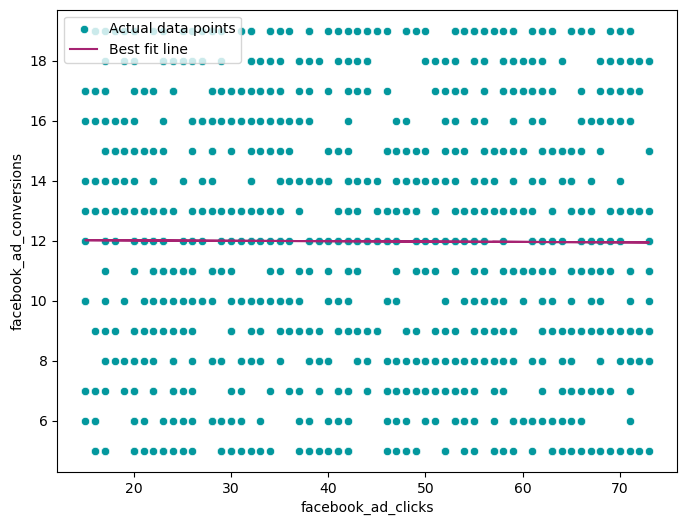

In [54]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = df['facebook_ad_clicks'], y = df['facebook_ad_conversions'], color = '#03989E', label = 'Actual data points')
plt.plot(df['facebook_ad_clicks'], prediction, color = '#A62372', label = 'Best fit line')
plt.legend()
plt.show()



In [55]:
print(f"For {50} Clicks, Expected Conversion : {round(reg_model.predict([[50]])[0][0],2)}")
print(f"For {80} Clicks, Expected Conversion : {round(reg_model.predict([[80]])[0][0],2)}")


For 50 Clicks, Expected Conversion : 11.97
For 80 Clicks, Expected Conversion : 11.93


• The model has a reasonably good predictive power, with an R² score of 0.0025%. This suggests that it can effectively predict Facebook ad conversions based on the number of Facebook ad clicks.  

• With the insights provided by the Linear Regression model, businesses can make informed decisions about resource allocation, budget planning, and campaign optimization.  

• For instance, knowing the expected number of Facebook ad conversions based on a certain number of Facebook ad clicks can help in setting realistic campaign goals, optimizing ad spend, and assessing the ROI of Facebook advertising efforts.  


# Analyzing Facebook Campaign Metrices over time.

In [56]:
# cleaning data (removing unwanted symbols from the columns and converting them to numerical columns)
df['facebook_ctr'] = df['facebook_ctr'].apply(lambda x: float(x[:-1]))
df['facebook_conversion_rate'] = df['facebook_conversion_rate'].apply(lambda x: float(x[:-1]))
df['facebook_cost_per_click'] = df['facebook_cost_per_click'].apply(lambda x: float(x[1:]))
df['facebook_cost_per_ad'] = df['facebook_cost_per_ad'].apply(lambda x: float(x[1:]))

TypeError: 'float' object is not subscriptable

In [57]:
df.dtypes

date_of_campaign                datetime64[ns]
facebook_ad_campaign                    object
facebook_ad_views                        int64
facebook_ad_clicks                       int64
facebook_ad_conversions                  int64
facebook_cost_per_ad                     int64
facebook_ctr                           float64
facebook_conversion_rate               float64
facebook_cost_per_click                float64
adword_ad_campaign                      object
adword_ad_views                          int64
adword_ad_clicks                         int64
adword_ad_conversions                    int64
adword_cost_per_ad                       int64
adword_ctr                             float64
adword_conversion_rate                 float64
adword_cost_per_click                  float64
facebook_conversion_category            object
adword_conversion_category              object
dtype: object

In [58]:
# filtering for facebook campaign
df = df[['date_of_campaign', 'facebook_ad_views',
'facebook_ad_clicks', 'facebook_ad_conversions', 'facebook_cost_per_ad',
'facebook_ctr',
'facebook_conversion_rate',
'facebook_cost_per_click']]

df.head()

,date_of_campaign,facebook_ad_views,facebook_ad_clicks,facebook_ad_conversions,facebook_cost_per_ad,facebook_ctr,facebook_conversion_rate,facebook_cost_per_click
0,2021-12-22,3172,62,14,141,1.95,22.58,2.27
1,2021-12-24,3211,38,9,186,1.18,23.68,4.89
2,2021-12-25,1936,53,15,66,2.74,28.30,1.25
3,2021-12-25,1194,45,9,71,3.77,20.00,1.58
4,2021-12-26,2479,44,12,174,1.77,27.27,3.95


# At what times of the month or days of week do we observe the conversions?

In [60]:
 # extracting month and week day from the data column
df['month'] = df['date_of_campaign'].dt.month
df['week'] = df['date_of_campaign'].dt.weekday 

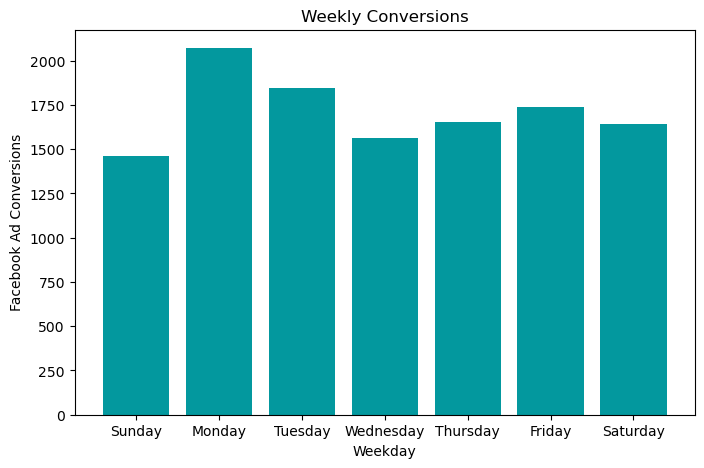

In [68]:
plt.figure(figsize=(8,5))
plt.title('Weekly Conversions')
weekly_conversion = df.groupby('week')[['facebook_ad_conversions']].sum()
week_names = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.bar(week_names, weekly_conversion['facebook_ad_conversions'], color = '#03989E')

plt.xlabel("Weekday")
plt.ylabel("Facebook Ad Conversions")
plt.show()


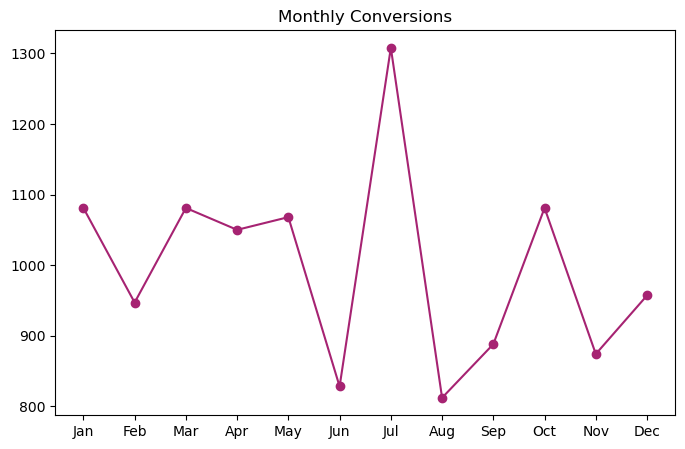

In [73]:
plt.figure(figsize=(8,5))
plt.title('Monthly Conversions')
monthly_conversion = df.groupby('month')[['facebook_ad_conversions']].sum()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.plot(month_names, monthly_conversion['facebook_ad_conversions'], '-o', color = '#A62372')
plt.show()


- Across the weekdays over a year, the total number of conversions remains relatively consistent, indicating a consistent level of engagement throughout the week. However, Mondays consistently exhibit the highest conversion rates compared to other days, suggesting that the beginning of the workweek sees heightened user engagement or responsiveness to marketing efforts.

- Examining the monthly trend in conversions reveals an overall upward trajectory, indicating a general increase in conversions over time. However, certain months stand out with variations in conversion rates. February, April, May, June, Augus Septembert, and November experience a decline in conversions compared to neighuboring months. These periods of decreased conversion rates could be influenced by factors such as seasonal fluctuations, changes in consumer behavuior, or adjustments in marketing strategies.


# How does the Cost Per Conversion (CPC) trend over time?

Cost Per Conversion (CPC): This metric is used to evaluate the cost effectiveness and profitability of an online advertising campaign. This metric helps marketers understand how much they are spending to obtain each conversion, allowing them to optimize their spending and targeting strategies effectively.

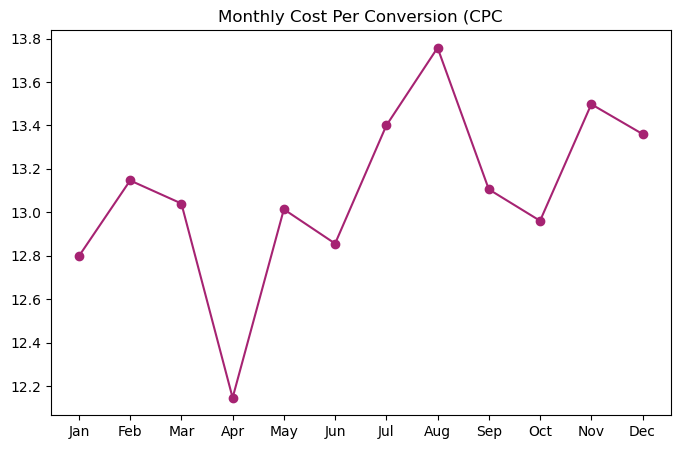

In [75]:
plt.figure(figsize=(8,5))
plt.title('Monthly Cost Per Conversion (CPC')
monthly_df = df.groupby('month') [['facebook_ad_conversions','facebook_cost_per_ad']].sum()
monthly_df['Cost per Conversion'] = monthly_df['facebook_cost_per_ad'] / monthly_df['facebook_ad_conversions']
plt.plot(month_names, monthly_df['Cost per Conversion'],'-o', color = '#A62372')
plt.show()

&bull; The CPC trend over the 12-month period shows some fluctuations but overall maintains a relatively stable range.  

&bull; April has the lowest CPC values, indicating potentially more cost-effective advertising or higher conversion rates during these periods.  

&bull; August has the highest CPC value, suggesting that advertising costs may be relatively higher during this month compared to others.  

&bull; Lower CPC values in certain months (e.g., April) could indicate periods of higher advertising effectiveness or more favourable market conditions.  

&bull; Consider allocating more advertising budget to months with historically lower CPC values (e.g., April) to maximise ROI.  


# Is there a long-term equilibrium relationship between advertising spend and conversion rates that suggests a stable, proportional impact of budget changes on conversion over time?

In [82]:
score, p_value, _ = coint(df['facebook_cost_per_ad'], df['facebook_ad_conversions'])
print('Collingrating test score:', score)
print('P-value:', p_value)
if p_value < 0.05:
    print("\np-value is less than significance value, Reject the null hypothesis")
else:
    print("\np-value is greater than significance value, Accept the null hypothesis")

Collingrating test score: -31.718943132420467
P-value: 0.0

p-value is less than significance value, Reject the null hypothesis


• Since the p-value is significantly lower than the chosen significance level, we reject the null hypothesis. This indicates that there is a long-term equilibrium relationship between advertising spend (cost) and conversions.

• Businesses can use this understanding of the stable relationship between cost and conversions to optimize their advertising strategies. By investing in campaigns that demonstrate a strong return on investment (ROI) and adjusting spending based on performance, companies can maximize conversions while minimizing cos  
